In [1]:
!pip install kaggle

In [2]:
!pip install kaggle

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [5]:
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 97% 159M/163M [00:02<00:00, 110MB/s]
100% 163M/163M [00:02<00:00, 65.0MB/s]


In [6]:
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [7]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mping
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [8]:
with_mask_files=os.listdir('/content/data/with_mask')
print(with_mask_files[:5])
print(with_mask_files[-5:])

['with_mask_3657.jpg', 'with_mask_1859.jpg', 'with_mask_1381.jpg', 'with_mask_3436.jpg', 'with_mask_1703.jpg']
['with_mask_3525.jpg', 'with_mask_1600.jpg', 'with_mask_774.jpg', 'with_mask_3305.jpg', 'with_mask_2758.jpg']


In [9]:
without_mask_files=os.listdir('/content/data/without_mask')
print(without_mask_files[:5])
print(without_mask_files[-5:])

['without_mask_1139.jpg', 'without_mask_2317.jpg', 'without_mask_1964.jpg', 'without_mask_2434.jpg', 'without_mask_628.jpg']
['without_mask_2384.jpg', 'without_mask_241.jpg', 'without_mask_3372.jpg', 'without_mask_2705.jpg', 'without_mask_360.jpg']


In [10]:
print(len(with_mask_files))

3725


In [11]:
print(len(without_mask_files))

3828


with mask -> 1
without mask -> 0

In [12]:
with_mask_labels=[1]*3725
without_mask_labels=[0]*3828

In [13]:
print(with_mask_labels[:5],without_mask_labels[:5])

[1, 1, 1, 1, 1] [0, 0, 0, 0, 0]


In [14]:
labels=with_mask_labels+without_mask_labels
print(labels[:5],len(labels))

[1, 1, 1, 1, 1] 7553


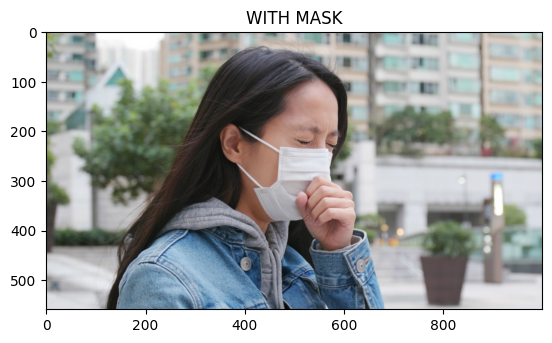

In [15]:
img=mping.imread('/content/data/with_mask/with_mask_3525.jpg')
imgplot=plt.imshow(img)
plt.title("WITH MASK")
plt.show()

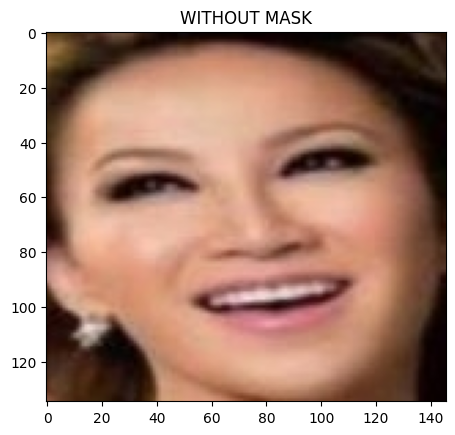

In [16]:
img=mping.imread('/content/data/without_mask/without_mask_421.jpg')
imgplot=plt.imshow(img)
plt.title("WITHOUT MASK")
plt.show()

In [17]:
from PIL import Image
import numpy as np
import os

# Paths
with_mask_path = '/content/data/with_mask/'
without_mask_path = '/content/data/without_mask/'

# File lists
with_mask_files = os.listdir(with_mask_path)
without_mask_files = os.listdir(without_mask_path)
data=[]

# Process with-mask images
for img_file in with_mask_files:
    image = Image.open(os.path.join(with_mask_path, img_file))
    image = image.resize((128, 128))
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)


# Process without-mask images
for img_file in without_mask_files:
    image = Image.open(os.path.join(without_mask_path, img_file))
    image = image.resize((128, 128))
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [18]:
type(data)

list

In [19]:
len(data)

7553

In [20]:
type(data[0])

numpy.ndarray

In [22]:
data[0].shape

(128, 128, 3)

In [23]:
x=np.array(data)
Y=np.array(labels)

In [26]:
x.shape

(7553, 128, 128, 3)

In [28]:
Y

array([1, 1, 1, ..., 0, 0, 0])

In [29]:
X_train,X_test,Y_train,Y_test=train_test_split(x,Y,test_size=0.2,random_state=2)

In [30]:
X_train.shape

(6042, 128, 128, 3)

In [32]:
X_test.shape

(1511, 128, 128, 3)

In [33]:
X_train_scaled=X_train/255
X_test_scaled=X_test/255

In [34]:
import tensorflow as tf
from tensorflow import keras

In [35]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [36]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [37]:
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 16s 52ms/step - acc: 0.7434 - loss: 0.6742 - val_acc: 0.8628 - val_loss: 0.3061
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - acc: 0.8749 - loss: 0.3167 - val_acc: 0.8893 - val_loss: 0.2548
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - acc: 0.9042 - loss: 0.2523 - val_acc: 0.9124 - val_loss: 0.2264
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - acc: 0.9257 - loss: 0.2000 - val_acc: 0.9157 - val_loss: 0.1965
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - acc: 0.9411 - loss: 0.1568 - val_acc: 0.9008 - val_loss: 0.2515


In [38]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - acc: 0.9149 - loss: 0.2413
Test Accuracy = 0.9040370583534241


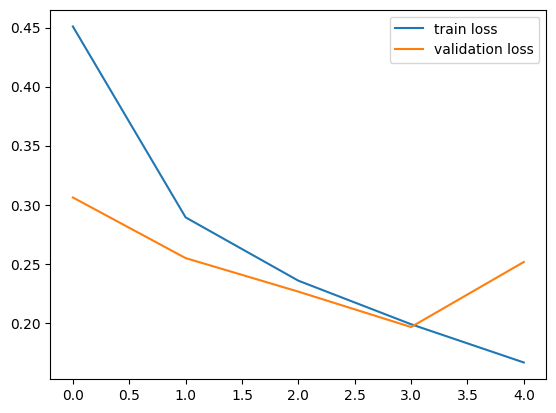

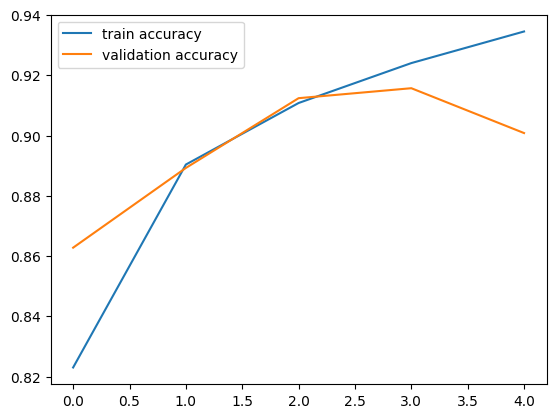

In [39]:
h = history
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

Path of the image to be predicted: /content/test.jpeg


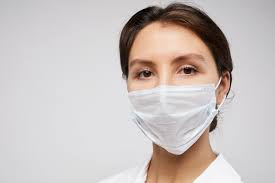

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 591ms/step
[[0.4583568  0.55481595]]
1
The person in the image is wearing a mask


In [41]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

Path of the image to be predicted: /content/test1.jpeg


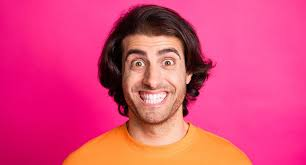

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
[[0.1296903  0.85222304]]
1
The person in the image is not wearing a mask


In [45]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is not wearing a mask')

else:

  print('The person in the image is wearing a mask')